In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
## Constants
PATH_TO_DEMAND_FILE = "Demand_History.csv"
PATH_TO_SUPPLY_FILE = "exisiting_EV_infrastructure_2018.csv"

In [5]:
df = pd.read_csv(PATH_TO_DEMAND_FILE)

In [72]:
years = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]
year_int = [int(y) for y in years]

In [79]:
# Create forecast dataset 
x = np.array(year_int * len(df))
y = df[years].values.flatten()

# Demand Visualisation

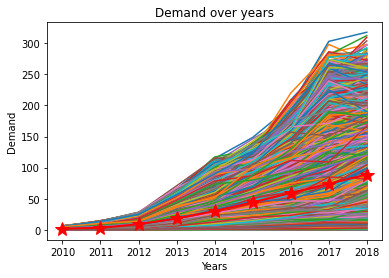

In [88]:
for d in df.demand_point_index.unique():
    condition = df.demand_point_index == d

    y_ax_points = df[condition][years].values[0]
    plt.plot(years, y_ax_points)

plt.title("Demand over years")
plt.xlabel("Years")
plt.ylabel("Demand")
plt.show()

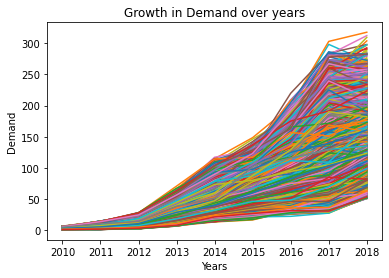

In [35]:
# Define high growth
df_growth = df[df["2010"] + 50 < df["2018"]].copy()


for d in df_growth.demand_point_index.unique():
    condition = df_growth.demand_point_index == d

    y_ax_points = df_growth[condition][years].values[0]
    plt.plot(years, y_ax_points)
plt.title("Growth in Demand over years")
plt.xlabel("Years")
plt.ylabel("Demand")
plt.show()

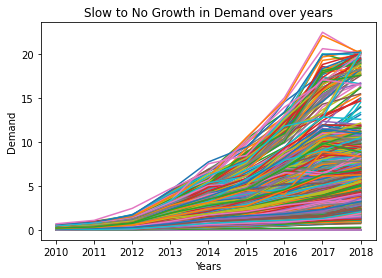

In [38]:
# Define low growth
df_no_growth = df[df["2010"] + 20 >= df["2018"]].copy()

for d in df_no_growth.demand_point_index.unique():
    condition = df_no_growth.demand_point_index == d

    y_ax_points = df_no_growth[condition][years].values[0]
    plt.plot(years, y_ax_points)
plt.title("Slow to No Growth in Demand over years")
plt.xlabel("Years")
plt.ylabel("Demand")
plt.show()

# Supply Visualisation

In [39]:
infra_df = pd.read_csv(PATH_TO_SUPPLY_FILE)

In [53]:
infra_df["total_spots_taken"] = infra_df.existing_num_SCS + infra_df.existing_num_FCS

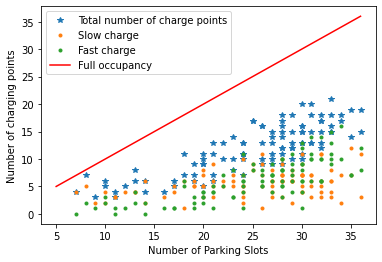

In [57]:

plt.plot(infra_df.total_parking_slots, infra_df.total_spots_taken, '*', label='Total number of charge points')
plt.plot(infra_df.total_parking_slots, infra_df.existing_num_SCS, '.', label='Slow charge')
plt.plot(infra_df.total_parking_slots, infra_df.existing_num_FCS, '.', label='Fast charge')

plt.xlabel("Number of Parking Slots")
plt.ylabel("Number of charging points")
plt.plot([5, infra_df.total_parking_slots.max()], [5, infra_df.total_parking_slots.max()], 'r-', label="Full occupancy")
plt.legend()

